In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress


In [3]:
anxiety_df = pd.read_csv("Resources/anxiety_attack_dataset.csv")
anxiety_df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [4]:
#Basic Information
display(anxiety_df.info)

<bound method DataFrame.info of           ID  Age  Gender Occupation  Sleep Hours  \
0          1   56  Female      Other          9.6   
1          2   46    Male    Teacher          6.4   
2          3   32  Female     Doctor          6.9   
3          4   60    Male     Doctor          9.2   
4          5   25    Male    Student          9.2   
...      ...  ...     ...        ...          ...   
11995  11996   28    Male   Engineer          4.4   
11996  11997   49  Female     Doctor          9.9   
11997  11998   23  Female    Student          9.8   
11998  11999   52    Male    Teacher          5.9   
11999  12000   50    Male    Teacher          6.6   

       Physical Activity (hrs/week)  Caffeine Intake (mg/day)  \
0                               8.3                       175   
1                               7.3                        97   
2                               1.0                       467   
3                               3.7                       471   
4     

In [5]:
anxiety_df.describe()

,ID,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.00000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,40.96675,6.482650,5.030892,246.696083,9.492833,5.462250,119.398500,25.462333,2.987417,4.518417,5.497333,5.507583
std,3464.24595,13.47328,2.014885,2.889000,144.487071,5.769364,2.897201,34.806711,8.090686,1.414482,2.866010,2.867579,2.858663
min,1.00000,18.00000,3.000000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,3000.75000,29.00000,4.800000,2.500000,122.000000,5.000000,3.000000,89.000000,18.000000,2.000000,2.000000,3.000000,3.000000
50%,6000.50000,41.00000,6.500000,5.000000,244.000000,9.000000,5.000000,119.000000,25.000000,3.000000,5.000000,5.000000,6.000000
75%,9000.25000,53.00000,8.200000,7.525000,371.000000,15.000000,8.000000,149.000000,32.000000,4.000000,7.000000,8.000000,8.000000
max,12000.00000,64.00000,10.000000,10.000000,499.000000,19.000000,10.000000,179.000000,39.000000,5.000000,9.000000,10.000000,10.000000


In [6]:
anxiety_df.isnull().sum()

ID                                   0
Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm during attack)       0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Severity of Anxiety Attack (1-10)    0
dtype: int64

In [7]:
anxiety_df.nunique()

ID                                   12000
Age                                     47
Gender                                   3
Occupation                               6
Sleep Hours                             71
Physical Activity (hrs/week)           101
Caffeine Intake (mg/day)               500
Alcohol Consumption (drinks/week)       20
Smoking                                  2
Family History of Anxiety                2
Stress Level (1-10)                     10
Heart Rate (bpm during attack)         120
Breathing Rate (breaths/min)            28
Sweating Level (1-5)                     5
Dizziness                                2
Medication                               2
Therapy Sessions (per month)            10
Recent Major Life Event                  2
Diet Quality (1-10)                     10
Severity of Anxiety Attack (1-10)       10
dtype: int64

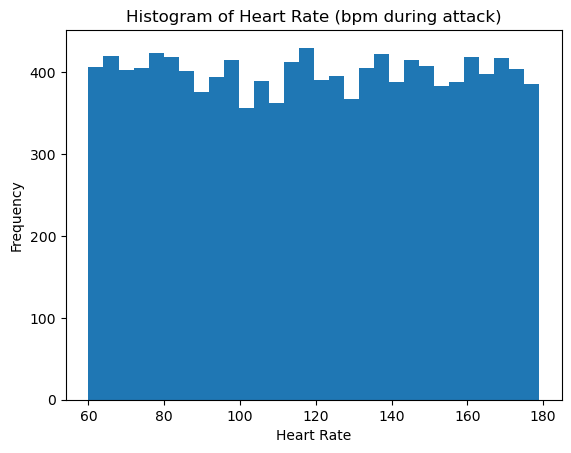

In [11]:
plt.hist(anxiety_df['Heart Rate (bpm during attack)'], bins=30)
plt.title('Histogram of Heart Rate (bpm during attack)')
plt.xlabel("Heart Rate")
plt.ylabel('Frequency')
plt.show()

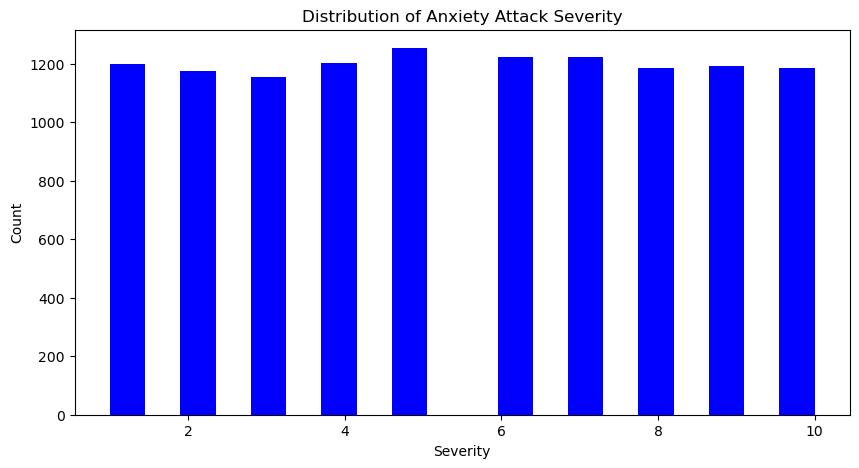

In [19]:
plt.figure(figsize=(10,5))
plt.hist(anxiety_df['Severity of Anxiety Attack (1-10)'], bins=20, color='blue')
plt.title('Distribution of Anxiety Attack Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

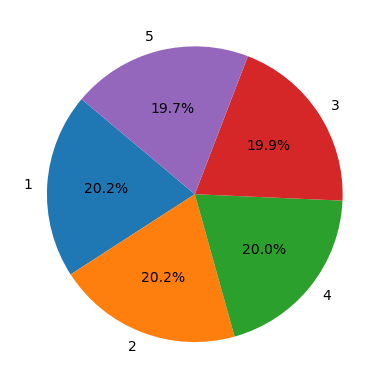

In [22]:
sweating_counts = anxiety_df['Sweating Level (1-5)'].value_counts()
plt.pie(sweating_counts, labels=sweating_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

This pie chart shows that sweating level is almost evenly distributed among the subjects in the dtataset. 

In [44]:
#Rewrite
# Calculate the correlation matrix
# Convert categorical variables to numeric
categorical_columns = ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication',  'Recent Major Life Event']
for column in categorical_columns:
    anxiety_df[column] = pd.Categorical(anxiety_df[column])
    anxiety_df[column] = anxiety_df[column].cat.codes

correlation_matrix = anxiety_df.corr()

# Display the correlation with the 'Severity of Anxiety Attack (1-10)'
severity_correlation = correlation_matrix["Severity of Anxiety Attack (1-10)"].sort_values(ascending=False)
print(severity_correlation)

Severity of Anxiety Attack (1-10)    1.000000
Dizziness                            0.018059
Physical Activity (hrs/week)         0.018012
Occupation                           0.012897
Gender                               0.011455
Alcohol Consumption (drinks/week)    0.009288
Sweating Level (1-5)                 0.008773
Breathing Rate (breaths/min)         0.006471
Caffeine Intake (mg/day)             0.004023
Family History of Anxiety            0.003921
Stress Level (1-10)                  0.003194
Medication                          -0.000048
Heart Rate (bpm during attack)      -0.000312
Sleep Hours                         -0.003293
Recent Major Life Event             -0.006458
Smoking                             -0.007751
Diet Quality (1-10)                 -0.010190
Therapy Sessions (per month)        -0.013648
ID                                  -0.018602
Age                                 -0.020083
Name: Severity of Anxiety Attack (1-10), dtype: float64
